In [342]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn .preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression



from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [343]:
## importing and exploring the dataset

In [344]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [345]:
type(data)

pandas.core.frame.DataFrame

In [346]:
data.shape

(299, 13)

In [347]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [348]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# we split data set into two catagories to make it easier for analysis 

In [349]:
categorical_var = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_var = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

In [350]:
type(categorical_var)

pandas.core.frame.DataFrame

In [351]:
pd.set_option('display.max_rows',300)
# data
# data.isna().sum()
data.is

SyntaxError: invalid syntax (946467928.py, line 4)

In [352]:
pd.set_option('display.max_rows',300)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [353]:
pd.set_option('display.max_rows',300)
data.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [354]:
continuous_var.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [355]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [356]:
age = data[['age']] 
platelets = data[["platelets"]]

In [357]:
type(data['age'])

pandas.core.series.Series

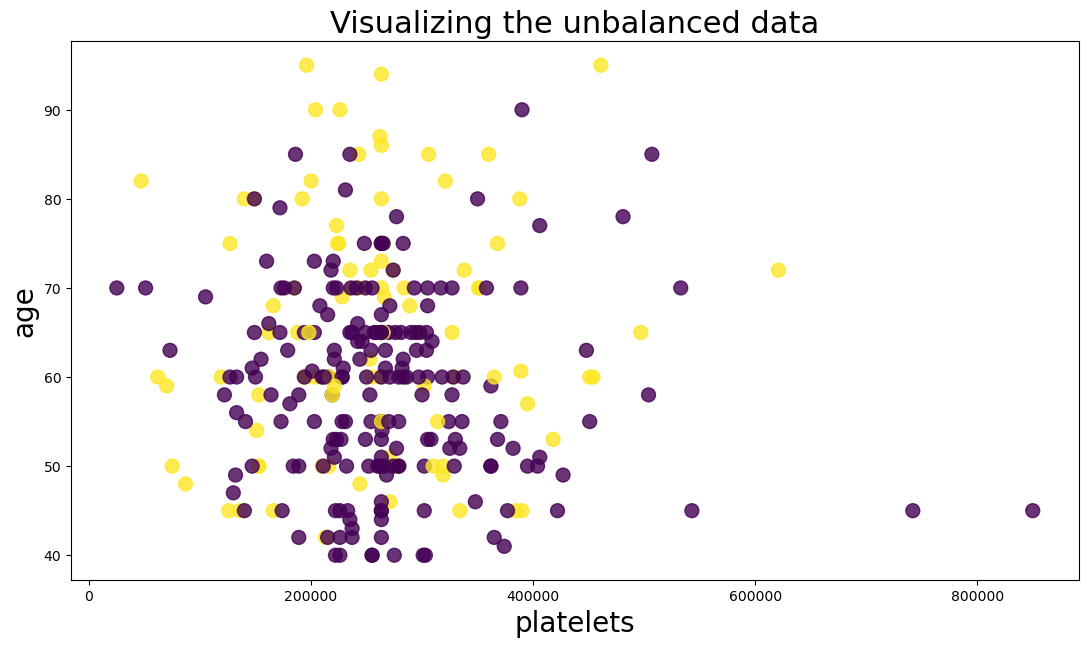

In [358]:
# visualizing the unbalanced data with a scatter plot , the color will depends on death_event 0 or 1

plt.figure(figsize= (13,7))
plt.scatter(platelets,age,c=data["DEATH_EVENT"],s = 100,alpha = 0.8)
plt.xlabel("platelets",fontsize = 20)
plt.ylabel("age",fontsize = 20)
plt.title("Visualizing the unbalanced data",fontsize =22)
plt.show()

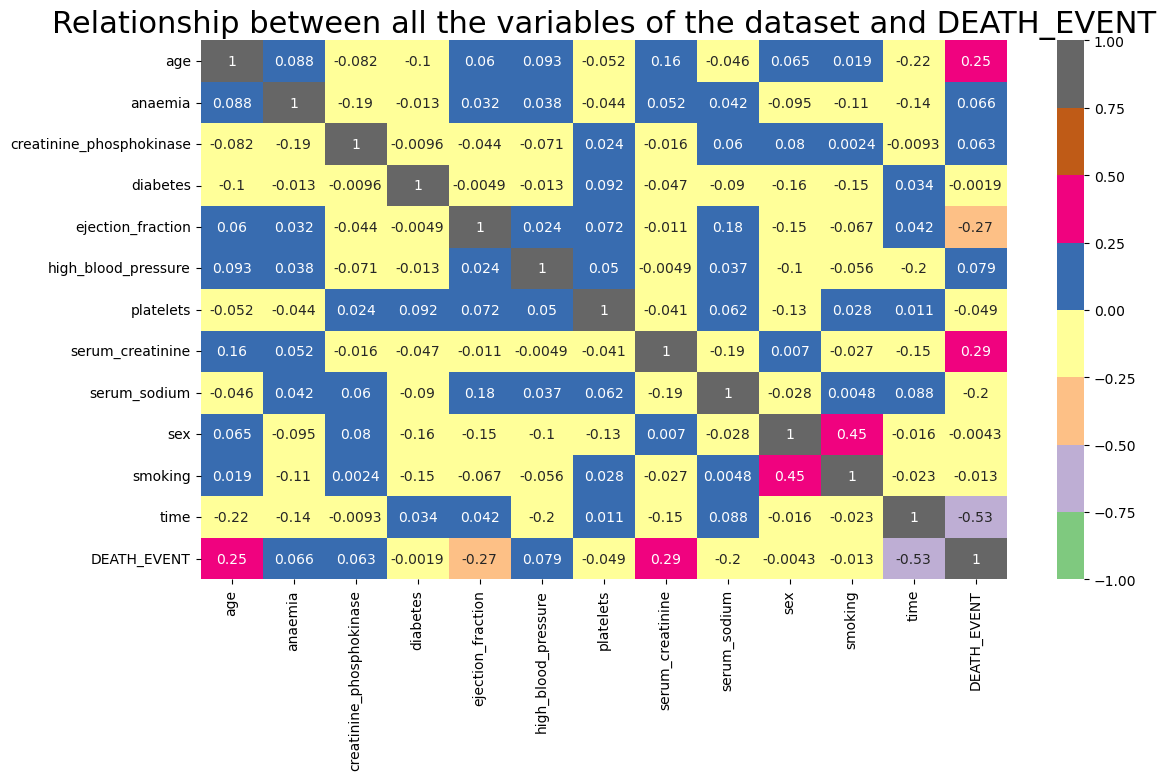

In [359]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap = 'Accent',annot = True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT",fontsize =22)
plt.show()

In [360]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [361]:
## Data visualization:

In [362]:
categorical_data = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_data = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

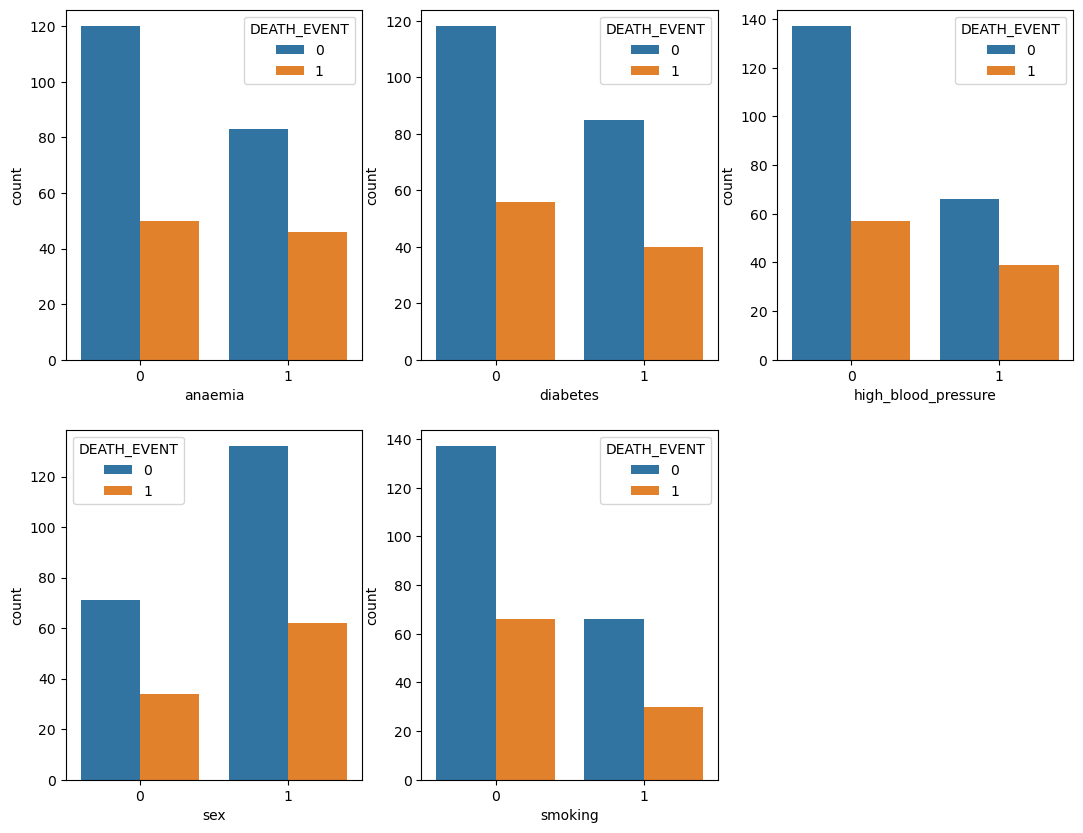

In [363]:
# plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i, cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat,hue = "DEATH_EVENT")
plt.show()
    
    
    
    

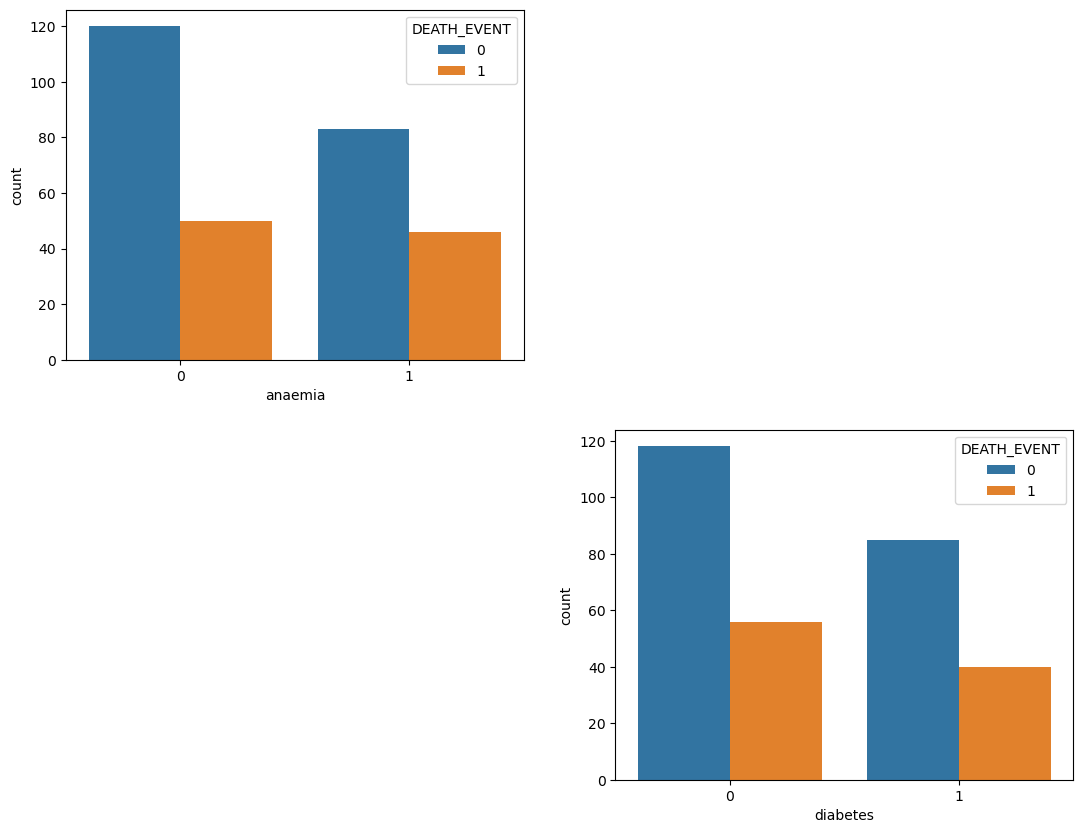

In [364]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.countplot(data= data , x = 'anaemia',hue = "DEATH_EVENT")
plt.subplot(2,2,4)
sns.countplot(data= data , x = 'diabetes',hue = "DEATH_EVENT")
plt.show()
    

In [365]:
for i,cat in enumerate(categorical_data):
    print(i,cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


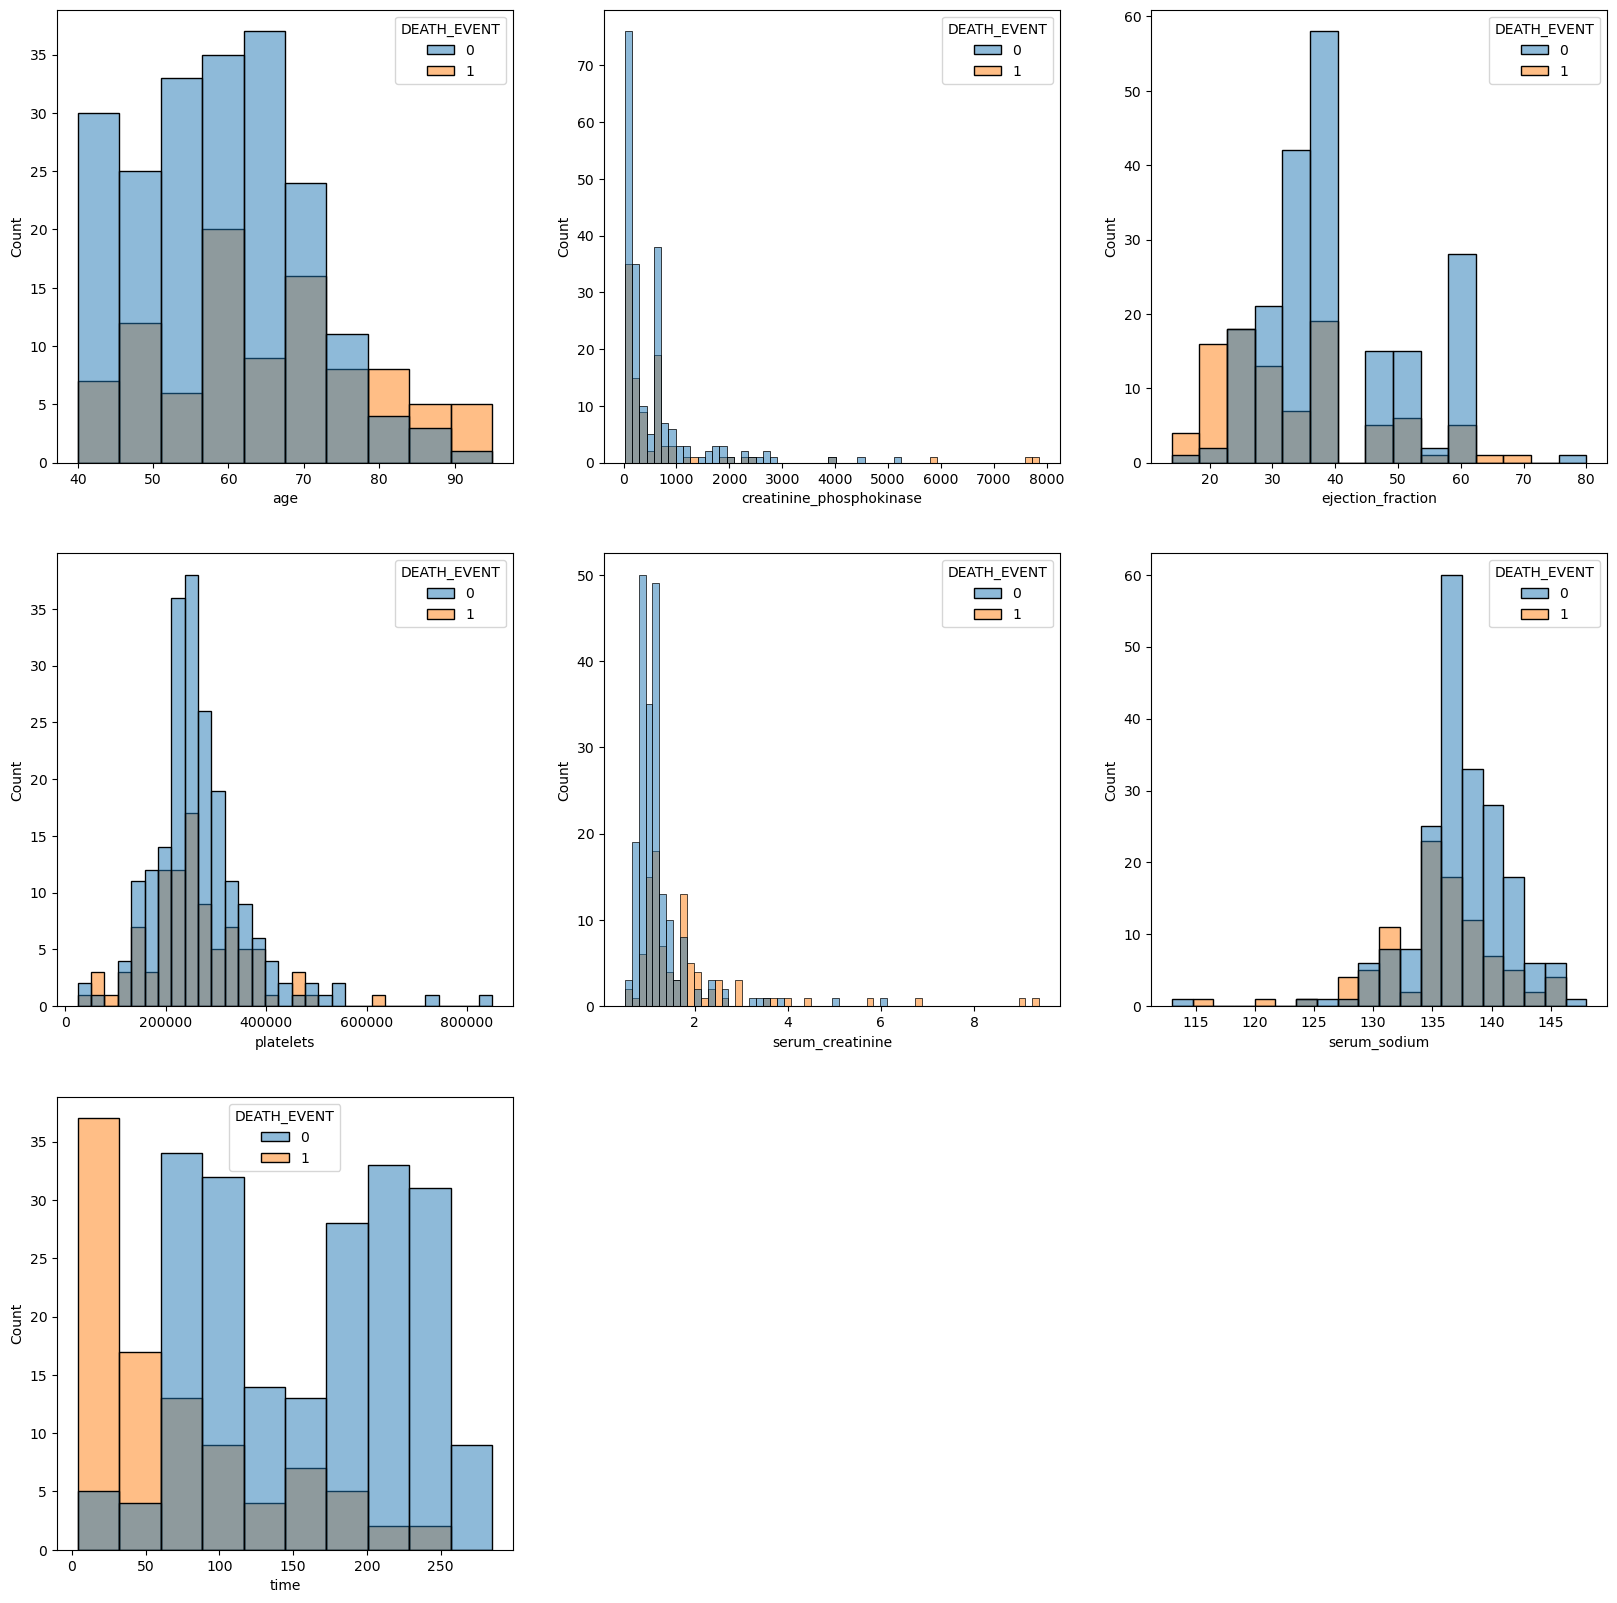

In [366]:
# Plotting  thr  impact continus variables on DEATH_EVENT
plt.figure(figsize= (20,20))
for j, con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data , x= con,hue = "DEATH_EVENT")
plt.show()

In [367]:
for i,cat in enumerate(continuous_data):
    print(i,cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


<AxesSubplot:xlabel='age', ylabel='Count'>

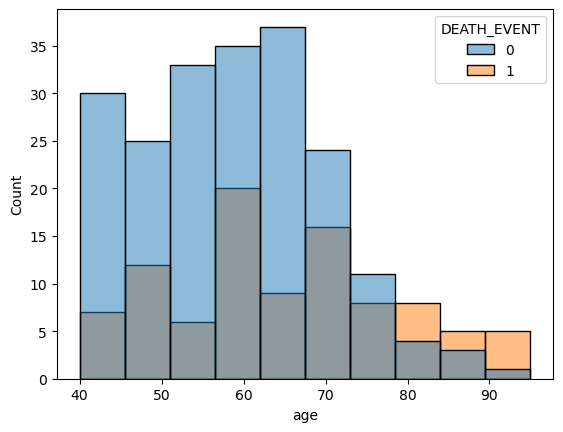

In [368]:
sns.histplot(data= data , x= "age",hue= "DEATH_EVENT")

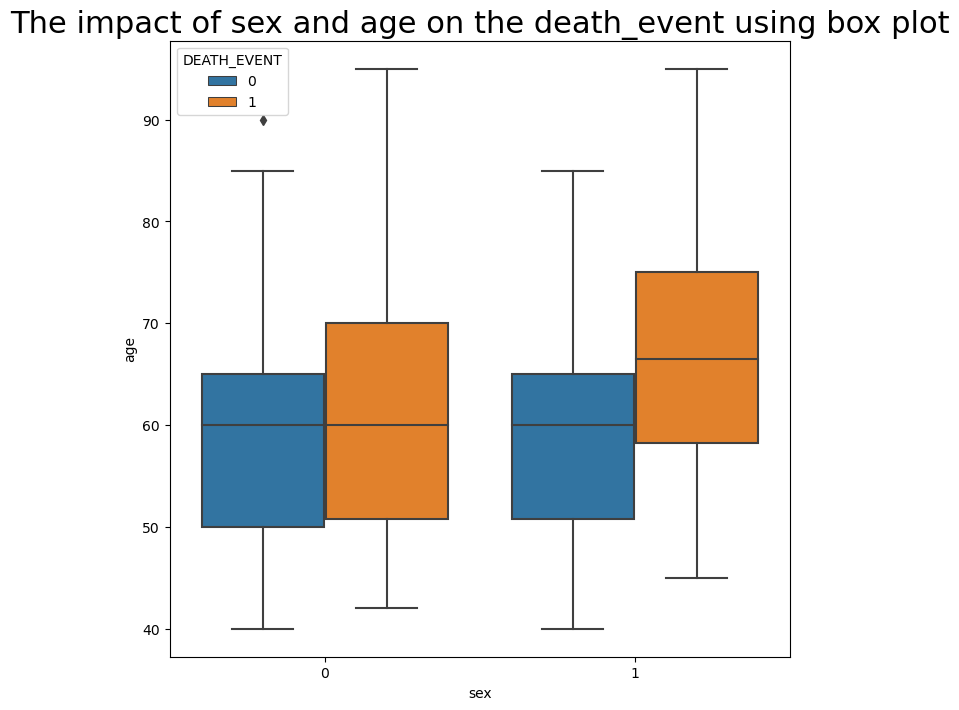

In [369]:
# box_plot

plt.figure(figsize = (8,8))
sns.boxplot(data= data,x= "sex",y= "age",hue= "DEATH_EVENT")
plt.title("The impact of sex and age on the death_event using box plot",fontsize=22)
plt.show()

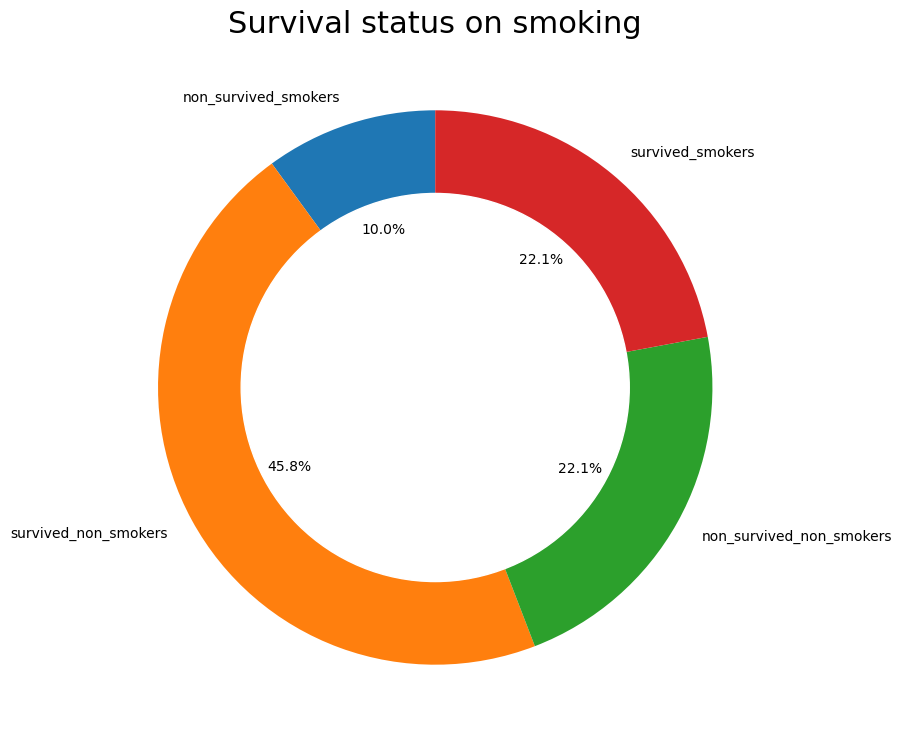

In [370]:
# analyzing the surviva; stats on smoking
smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers),len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers","survived_non_smokers","non_survived_non_smokers","survived_smokers"]


plt.figure(figsize= (9,9))
plt.pie(smoking_data,labels= smoking_labels,autopct='%.1f%%',startangle=90)
circle = plt.Circle((0,0),0.7,color= "white")
p = plt.gcf()

p.gca().add_artist(circle)
plt.title("Survival status on smoking",fontsize= 22)
plt.show()





In [371]:
type(non_smokers)

pandas.core.frame.DataFrame

In [372]:
smokers[smokers["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


In [373]:
len(smokers[smokers["DEATH_EVENT"]==1])

30

In [374]:
(len(non_survived_smokers)/299)*100

10.033444816053512

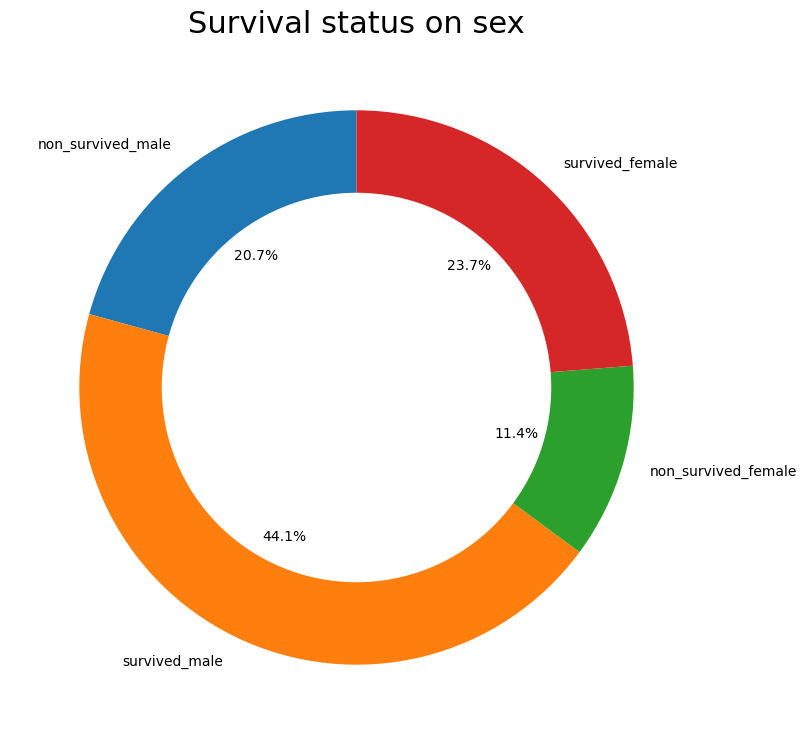

In [375]:
# analyzing the surviva; stats on sex
male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male),len(survived_male),len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]


plt.figure(figsize= (9,9))
plt.pie(sex_data,labels= sex_labels,autopct='%.1f%%',startangle=90)
circle = plt.Circle((0,0),0.7,color= "white")
p = plt.gcf()

p.gca().add_artist(circle)
plt.title("Survival status on sex",fontsize= 22)
plt.show()

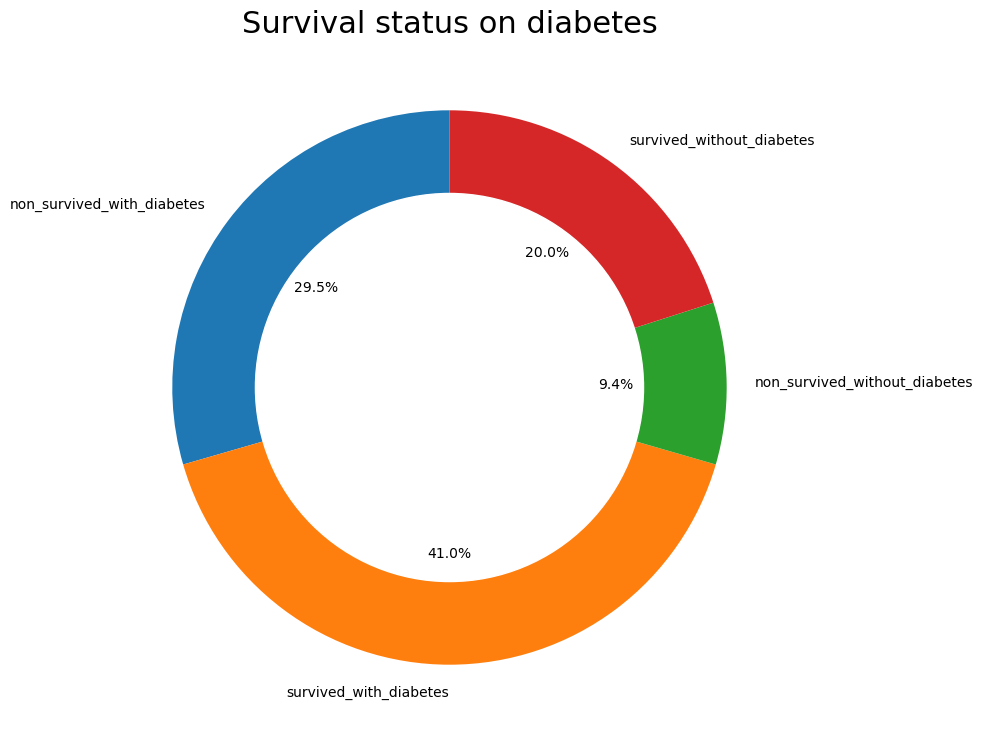

In [376]:
# analyzing the surviva; stats on diabetes
a = data[data["diabetes"]==1]
b = data[data["diabetes"]==0]

c = a[a["DEATH_EVENT"]==1]
d= a[a["DEATH_EVENT"]==0]
e = b[b["DEATH_EVENT"]==1]
f = b[b["DEATH_EVENT"]==0]

diabetes_data = [len(a),len(b),len(c),len(d)]
diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes","survived_without_diabetes"]


plt.figure(figsize= (9,9))
plt.pie(diabetes_data,labels= diabetes_labels,autopct='%.1f%%',startangle=90)
circle = plt.Circle((0,0),0.7,color= "white")
p = plt.gcf()

p.gca().add_artist(circle)
plt.title("Survival status on diabetes",fontsize= 22)
plt.show()





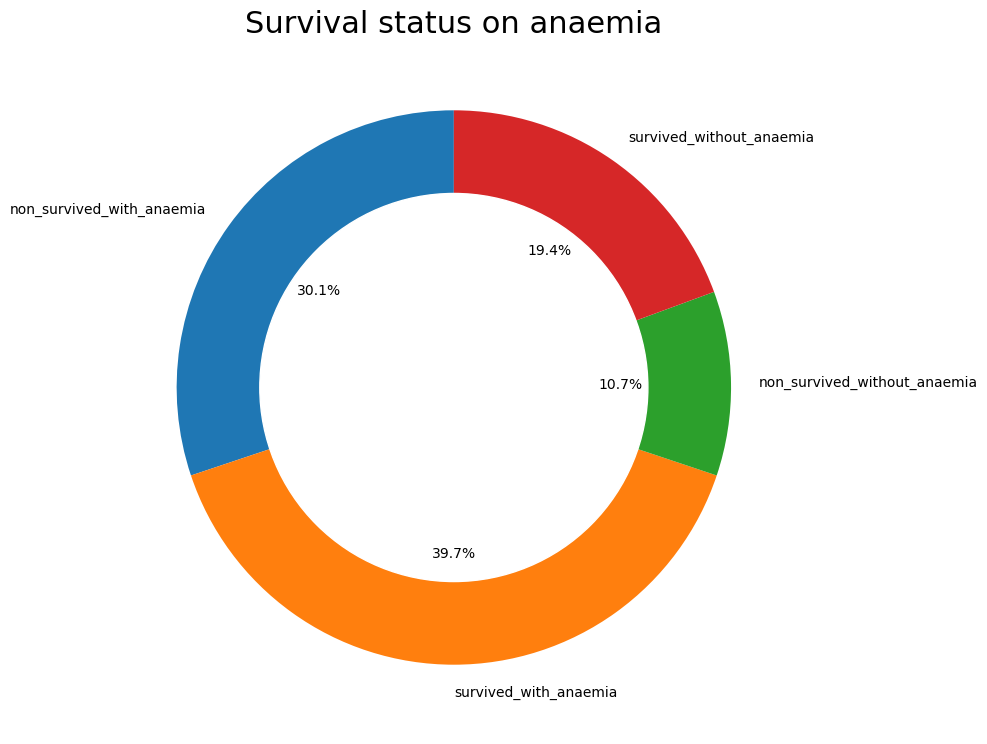

In [377]:

# analyzing the surviva; stats on anaemia
a = data[data["anaemia"]==1]
b = data[data["anaemia"]==0]

c = a[a["DEATH_EVENT"]==1]
d= a[a["DEATH_EVENT"]==0]
e = b[b["DEATH_EVENT"]==1]
f = b[b["DEATH_EVENT"]==0]

anaemia_data = [len(a),len(b),len(c),len(d)]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia","survived_without_anaemia"]


plt.figure(figsize= (9,9))
plt.pie(anaemia_data,labels= anaemia_labels,autopct='%.1f%%',startangle=90)
circle = plt.Circle((0,0),0.7,color= "white")
p = plt.gcf()

p.gca().add_artist(circle)
plt.title("Survival status on anaemia",fontsize= 22)
plt.show()


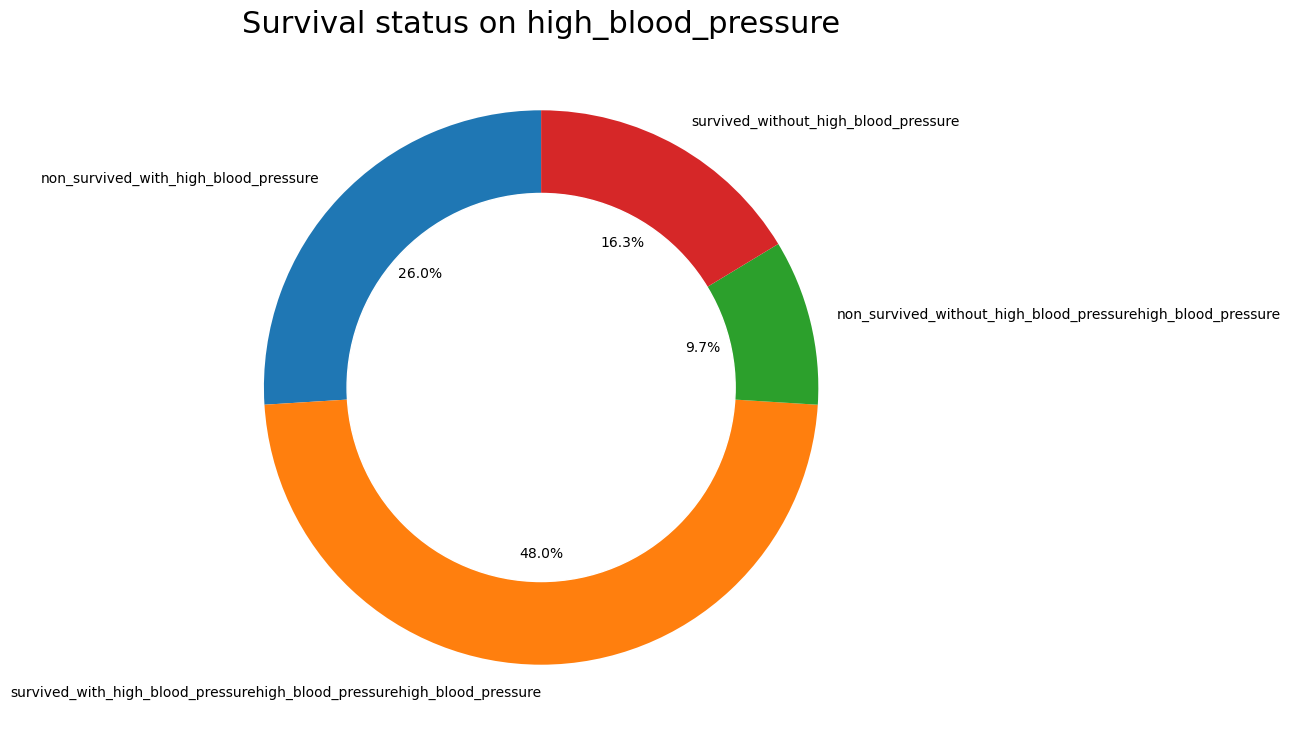

In [378]:
# analyzing the surviva; stats on high_blood_pressure
a = data[data["high_blood_pressure"]==1]
b = data[data["high_blood_pressure"]==0]

c = a[a["DEATH_EVENT"]==1]
d= a[a["DEATH_EVENT"]==0]
e = b[b["DEATH_EVENT"]==1]
f = b[b["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(a),len(b),len(c),len(d)]
high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressurehigh_blood_pressurehigh_blood_pressure","non_survived_without_high_blood_pressurehigh_blood_pressure","survived_without_high_blood_pressure"]


plt.figure(figsize= (9,9))
plt.pie(high_blood_pressure_data,labels= high_blood_pressure_labels,autopct='%.1f%%',startangle=90)
circle = plt.Circle((0,0),0.7,color= "white")
p = plt.gcf()

p.gca().add_artist(circle)
plt.title("Survival status on high_blood_pressure",fontsize= 22)
plt.show()





#  3. Data modeling & prediction using continuous data:

In [379]:

x = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [380]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=2)

In [381]:


#data_scailing

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [382]:
# a list  to save all the values from diff model accurancy for comparaison using bar chart
accuracy_list = []

## 3.1 Logistic Regression

In [383]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled,y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction,y_test),4)*100) # %
accuracy_list.append(lr_accuracy)

## 3.2 Support Vector Machine

In [384]:
svm_model = SVC()
svm_model.fit(x_train_scaled,y_train)
svm_prediction = svm_model.predict(x_test_scaled)
svm_accuracy = (round(accuracy_score(svm_prediction,y_test),4)*100) # %
accuracy_list.append(svm_accuracy)

## 3.3 KNearestNeighbors


In [385]:
# knn_list = []
# for k in range(1,50):
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(x_train_scaled,y_train)
#     knn_prediction = knn_model.predict(x_test_scaled)
#     knn_accuracy = (round(accuracy_score(knn_prediction,y_test),4)*100) # %
#     accuracy_list.append(knn_accuracy)
# k = np.arange(1,50)
# plt.plot(k,knn_list)

In [386]:
# knn_model = KNeighborsClassifier(n_neighbors=6)
# knn_model.fit(x_train_scaled,y_train)
# knn_prediction = knn_model.predict(x_test_scaled)
# knn_accuracy = (round(accuracy_score(knn_prediction,y_test),4)*100) # %
# accuracy_list.append(knn_accuracy)

## 3.4 Decision tree classifier

In [387]:
# dt_model = DecisionTreeClassifier()
# dt_model.fit(x_train_scaled,y_train)
# dt_prediction = dt_model.predict(x_test_scaled)
# dt_accuracy = (round(accuracy_score(dt_prediction,y_test),4)*100) # %
# accuracy_list.append(dt_accuracy)

## 3.5 Naive Bayes

In [388]:
# nb_model = GaussianNB()
# nb_model.fit(x_train_scaled,y_train)
# nb_prediction = nb_model.predict(x_test_scaled)
# nb_accuracy = (round(accuracy_score(nb_prediction,y_test),4)*100) # %
# accuracy_list.append(nb_accuracy)

## 3.6 Random Forest Classifier

In [389]:
# rf_model = RandomForestClassifier()
# rf_model.fit(x_train_scaled,y_train)
# rf_prediction = rf_model.predict(x_test_scaled)
# rf_accuracy = (round(accuracy_score(rf_prediction,y_test),4)*100) # %
# accuracy_list.append(rf_accuracy)

In [390]:
# accuracy_list

In [391]:
# models = ["LogisticRegression","SVC","Decision Tree","Naive Bayes","Random Forest"] #"KNearestNeighbors"

In [392]:
# plt.figure(figsize=(12,7))
# ax = sns.barplot(x=models,y=accuracy_list)
# plt.xlabel("Classifier",fontsize=15)
# plt.ylabel("Accuracy (%)" ,fontsize=15)

# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x =p.get_width()
#     y = p.get_height()
#     ax.annotate(f"{height} %",(x+width/2,y+height*1.01),ha = "center")
# plt.show()